In [1]:
from glob import glob
import pandas as pd
import numpy as np
from scipy import stats  
import matplotlib.pyplot as plt
import japanize_matplotlib

In [3]:
files = glob("../csv/演習問題_データアナリティクス基礎/*")
for i, f in enumerate(files):
    print(i, f)


0 ../csv/演習問題_データアナリティクス基礎\第10章演習問題_乱数で発生させて分布の基本統計量.xlsx
1 ../csv/演習問題_データアナリティクス基礎\第2章演習問題_クレームデータ.xlsx
2 ../csv/演習問題_データアナリティクス基礎\第3章演習問題_職場ストレス.xlsx
3 ../csv/演習問題_データアナリティクス基礎\第4章演習問題_児童のネット利用時間.xlsx
4 ../csv/演習問題_データアナリティクス基礎\第5章演習問題_生鮮野菜の購入額.xlsx
5 ../csv/演習問題_データアナリティクス基礎\第7章演習問題_授業効果の検証.xlsx
6 ../csv/演習問題_データアナリティクス基礎\第8章演習問題1_健康食品・化粧品販売額.xlsx
7 ../csv/演習問題_データアナリティクス基礎\第8章演習問題2_百貨店の衣料品売上高.xlsx
8 ../csv/演習問題_データアナリティクス基礎\第9章演習問題_自由記述データ＆形態素解析データ.xlsx


In [6]:
df = pd.read_excel(files[4])
print(df.columns)
# df.columns = ['id', 'volume', 'population', 'cabbage', 'spinach', 'chinese_cabbage', 'green_onion', 'lettuce']
df.info()
df.head()

Index(['地域ID', '面積（㎢）', '人口（人）', 'キャベツ（円）', 'ほうれんそう（円）', 'はくさい（円）', 'ねぎ（円）',
       'レタス（円）'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   地域ID       52 non-null     int64  
 1   面積（㎢）      52 non-null     float64
 2   人口（人）      52 non-null     int64  
 3   キャベツ（円）    52 non-null     int64  
 4   ほうれんそう（円）  52 non-null     int64  
 5   はくさい（円）    52 non-null     int64  
 6   ねぎ（円）      52 non-null     int64  
 7   レタス（円）     52 non-null     int64  
dtypes: float64(1), int64(7)
memory usage: 3.4 KB


,地域ID,面積（㎢）,人口（人）,キャベツ（円）,ほうれんそう（円）,はくさい（円）,ねぎ（円）,レタス（円）
0,1,886.47,275192,3348,3222,1244,2925,2128
1,2,437.71,3777491,3370,2585,1360,3891,3082
2,3,1241.74,262328,3247,2813,1499,3018,2456
3,4,627.63,9733276,3124,2479,1346,4072,3256
4,5,271.78,332149,2978,2752,1332,3786,2991


面積と人口の相関係数: 0.03

In [12]:
df[['面積（㎢）', '人口（人）']].corr()

,面積（㎢）,人口（人）
面積（㎢）,1.000000,0.032603
人口（人）,0.032603,1.000000


レタスとキャベツの散布図

In [26]:
vagetable = ['キャベツ（円）', 'ほうれんそう（円）', 'はくさい（円）', 'ねぎ（円）', 'レタス（円）']
from itertools import combinations
vagetables = np.array(list(combinations(vagetable, 2))).reshape(2, 5, 2)

for i_list in vagetables:
    for j in i_list:
        print(j)

['キャベツ（円）' 'ほうれんそう（円）']
['キャベツ（円）' 'はくさい（円）']
['キャベツ（円）' 'ねぎ（円）']
['キャベツ（円）' 'レタス（円）']
['ほうれんそう（円）' 'はくさい（円）']
['ほうれんそう（円）' 'ねぎ（円）']
['ほうれんそう（円）' 'レタス（円）']
['はくさい（円）' 'ねぎ（円）']
['はくさい（円）' 'レタス（円）']
['ねぎ（円）' 'レタス（円）']


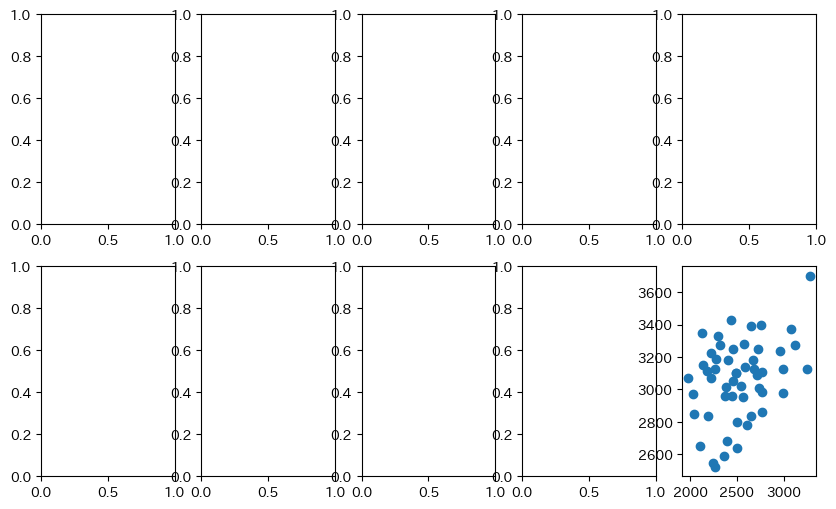

In [27]:
fig, axs = plt.subplots(2, 5, figsize=(10, 6))

plt.scatter(df['レタス（円）'], df['キャベツ（円）'])